Implementation of anomaly detection and collaborative filtering algorithms utilizing Python's numpy package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

In [3]:
data = loadmat("ex8data1.mat")
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']


In [4]:
X = data["X"]
print X.shape

(307L, 2L)


C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


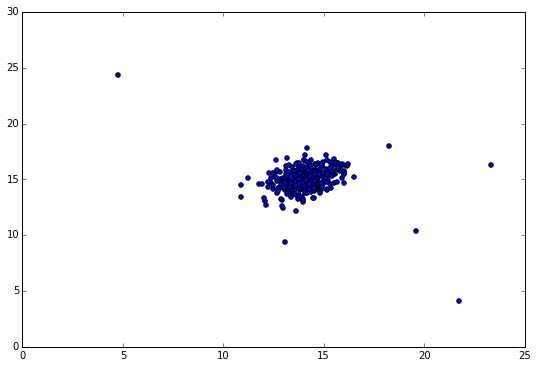

In [5]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1])

In [6]:
#get mean and variance
def estimate_gauss(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    
    return mu, sigma

In [7]:
mu, sigma = estimate_gauss(X)
print mu, sigma

[ 14.11222578  14.99771051] [ 1.83263141  1.70974533]


In [8]:
Xval = data["Xval"]
yval = data["yval"]
print Xval.shape, yval.shape

(307L, 2L) (307L, 1L)


In [9]:
from scipy import stats

In [10]:
dist = stats.norm(mu[0], sigma[0])
print dist.pdf(15)

0.193587504462


In [17]:
#probability distribution function for normal distribution
def pdf(x, mu, sigma):
    return 1.0 / (sigma * np.sqrt(np.pi * 2.0)) * np.exp(-(x - mu)**2/(2.0*sigma**2))

In [18]:
print pdf(15, mu[0], sigma[0])

0.193587504462


In [20]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm(mu[0], sigma[0]).pdf(X[:, 0])
p[:, 1] = stats.norm(mu[1], sigma[1]).pdf(X[:, 1])
print p.shape

(307L, 2L)


In [21]:
#calculate pdf values with mu and sigma from training X
pval = np.zeros((Xval.shape[0], Xval.shape[1])) 
pval[:, 0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:, 0])
pval[:, 1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:, 1])
print pval.shape

(307L, 2L)


In [36]:
def f1(pval, yval, epsilon):
    preds = pval < epsilon
    tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
    fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
    fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        
    precision = tp / (tp + fp) #accuracy when prediction of y = 1 is made
    recall = tp / (tp + fn)  #total proportion of y = 1 captured
    f1 = (2.0 * precision * recall) / (precision + recall)
    return f1
print f1(pval, yval, 8.99*10e-5)

0.434782608696


In [34]:
def select_threshold(pval, yval):
    best_epsilon = 0.0
    best_f1 = 0.0
    f1 = 0.0
    step = (pval.max() - pval.min()) / 1000.0 
    
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon #classify as anomaly if pdf value less than threshold
        #number of true positives, false positives, false negatives
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        
        precision = tp / (tp + fp) #accuracy when prediction of y = 1 is made
        recall = tp / (tp + fn)  #total proportion of y = 1 captured
        f1 = (2.0 * precision * recall) / (precision + recall)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    
    return best_epsilon, best_f1

In [35]:
epsilon, f1 = select_threshold(pval, yval)
print epsilon, f1

0.00956670600596 0.714285714286


C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\IPython\kernel\__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


In [37]:
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

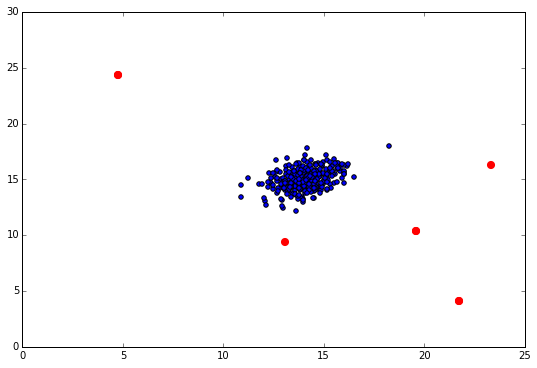

In [38]:
#Outliers marked as red points
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[outliers[0], 0], X[outliers[0], 1], s=50, color="r", marker="o")

In [40]:
data2 = loadmat("ex8data2.mat")
print data2.keys()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']


In [41]:
X2 = data2["X"]
print X2.shape

(1000L, 11L)


In [42]:
mu2, sigma2 = estimate_gauss(X2)
print mu2, sigma2

[  4.93940034  -9.63726819  13.81470749 -10.4644888   -7.95622922
  10.19950372  -6.01940755   7.96982896  -6.2531819    2.32451289
   8.47372252] [ 60.97489373  53.20572186  58.51546272  84.20403725  65.26859177
  89.57487757  55.63349911  87.16233783  29.62926829  70.7852052
  50.50356719]


In [43]:
Xval2 = data2["Xval"]
yval2 = data2["yval"]
print Xval2.shape, yval2.shape

(100L, 11L) (100L, 1L)


In [46]:
p2 = np.zeros((X2.shape[0], X2.shape[1]))
for i in range(X2.shape[1]):
    p2[:, i] = stats.norm(mu2[i], sigma2[i]).pdf(X2[:, i])
print p2.shape

(1000L, 11L)


In [47]:
pval2 = np.zeros((Xval2.shape[0], Xval2.shape[1]))
for i in range(Xval2.shape[1]):
    pval2[:, i] = stats.norm(mu2[i], sigma2[i]).pdf(Xval2[:, i])
print pval2.shape

(100L, 11L)


In [48]:
epsilon2, f1_2 = select_threshold(pval2, yval2)
print epsilon2, f1_2

0.012420382026 0.1875


C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\IPython\kernel\__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


In [52]:
outliers2 = np.where(pval2 < epsilon2)
print len(outliers2[0])

1010


In [2]:
data = loadmat("ex8_movies.mat")
print data.keys()

['Y', 'R', '__version__', '__header__', '__globals__']


In [3]:
Y = data["Y"]
R = data["R"]
print Y.shape, R.shape

(1682L, 943L) (1682L, 943L)


In [4]:
Y[1, R[1, :]].mean()

2.5832449628844114

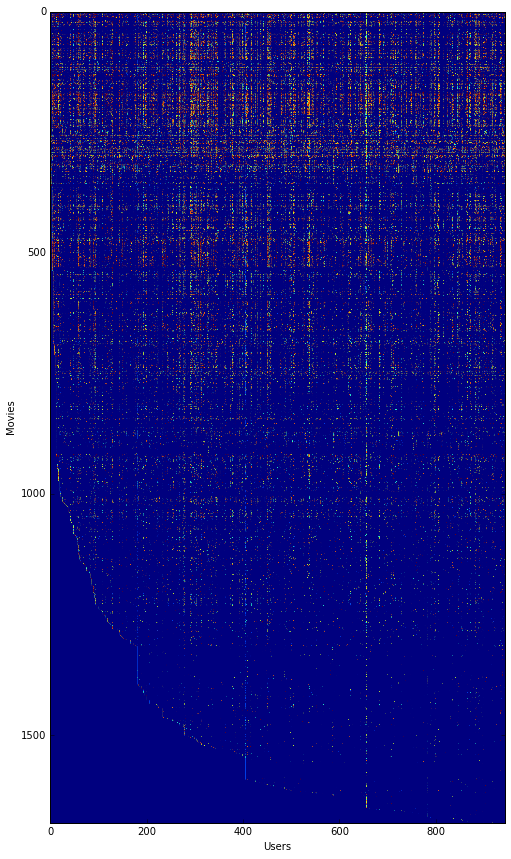

In [7]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.imshow(Y)
ax.set_xlabel("Users")
ax.set_ylabel("Movies")
fig.tight_layout()

In [4]:
params_data = loadmat("ex8_movieParams.mat")
X = params_data["X"]
theta = params_data["Theta"]
print X.shape, theta.shape

(1682L, 10L) (943L, 10L)


In [5]:
def cost(params, Y, R, num_features, learning_rate):
    Y = np.matrix(Y)  #1682 by 943 matrix, rows are movies, columns are users
    R = np.matrix(R) #1682 by 943 matrix, indicator 1, 0 for whether user rated movie or not
    num_movies = Y.shape[0]  #number of movies and users
    num_users = Y.shape[1]
    
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features))) #reshape to 1682 by 10 matrix
    theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features))) #943 by 10 matrix
    
    J = 0.0
    X_grad = np.zeros(X.shape)  #1682 by 10 matrix
    theta_grad = np.zeros(theta.shape) #943 by 10 matrix
    
    error = np.multiply((X * theta.T) - Y, R) #1682 by 943 matrix, errors considered for movies actually rated
    squared_error = np.power(error, 2) #square errors calculated above
    J = 0.5 * np.sum(squared_error)
    J += (learning_rate / 2.0) * np.sum(np.power(theta, 2)) #add squared coefficients 
    J += (learning_rate / 2.0) * np.sum(np.power(X, 2)) #regularization for features
    
    #calculate gradients
    X_grad = (error * theta) + (learning_rate * X)
    theta_grad = (error.T * X) + (learning_rate * theta)
    grad = np.concatenate((np.ravel(X_grad), np.ravel(theta_grad)))  #unravel gradient matrices into array structure
    
    return J, grad

In [6]:
users = 4
movies = 5
features = 3

X_sub = X[:movies, :features]
theta_sub = theta[:users, :features]
Y_sub = Y[:movies, :users]
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(theta_sub)))
J, grad = cost(params, Y_sub, R_sub, features, 1.5)
print "Cost:", J
print "Gradient:", grad

Cost: 31.3440562443
Gradient: [ -0.95596339   6.97535514  -0.10861109   0.60308088   2.77421145
   0.25839822   0.12985616   4.0898522   -0.89247334   0.29684395
   1.06300933   0.66738144   0.60252677   4.90185327  -0.19747928
 -10.13985478   2.10136256  -6.76563628  -2.29347024   0.48244098
  -2.99791422  -0.64787484  -0.71820673   1.27006666   1.09289758
  -0.40784086   0.49026541]


In [28]:
movie_idx = {}
with open("movie_ids.txt", "rb") as infile:
    for line in infile:
        tokens = line.split(" ")  #split by spaces
        tokens[-1] = tokens[-1][:-1] #remove next line character
        movie_idx[int(tokens[0]) - 1] = " ".join(tokens[1:]) 
movie_idx[0]

'Toy Story (1995)'

In [83]:
ratings = np.zeros((1682, 1))

ratings[0] = 3
ratings[6] = 4
ratings[11] = 5
ratings[53] = 2
ratings[63] = 5
ratings[65] = 1
ratings[68] = 3
ratings[97] = 5
ratings[182] = 5
ratings[225] = 3
ratings[354] = 1

print "Rated {0} with {1} stars.".format(movie_idx[0], str(int(ratings[0])))
print "Rated {0} with {1} stars.".format(movie_idx[6], str(int(ratings[6])))
print "Rated {0} with {1} stars.".format(movie_idx[11], str(int(ratings[11])))
print "Rated {0} with {1} stars.".format(movie_idx[53], str(int(ratings[53])))
print "Rated {0} with {1} stars.".format(movie_idx[63], str(int(ratings[63])))
print "Rated {0} with {1} stars.".format(movie_idx[65], str(int(ratings[65])))
print "Rated {0} with {1} stars.".format(movie_idx[68], str(int(ratings[68])))
print "Rated {0} with {1} stars.".format(movie_idx[97], str(int(ratings[97])))
print "Rated {0} with {1} stars.".format(movie_idx[182], str(int(ratings[182])))
print "Rated {0} with {1} stars.".format(movie_idx[225], str(int(ratings[225])))
print "Rated {0} with {1} stars.".format(movie_idx[354], str(int(ratings[354])))

Rated Toy Story (1995) with 3 stars.
Rated Twelve Monkeys (1995) with 4 stars.
Rated Usual Suspects, The (1995) with 5 stars.
Rated Outbreak (1995) with 2 stars.
Rated Shawshank Redemption, The (1994) with 5 stars.
Rated While You Were Sleeping (1995) with 1 stars.
Rated Forrest Gump (1994) with 3 stars.
Rated Silence of the Lambs, The (1991) with 5 stars.
Rated Alien (1979) with 5 stars.
Rated Die Hard 2 (1990) with 3 stars.
Rated Sphere (1998) with 1 stars.


In [84]:
R = data["R"]
Y = data["Y"]

Y = np.append(Y, ratings, axis=1)
R = np.append(R, ratings != 0, axis = 1)
print Y.shape, R.shape, ratings.shape #added new ratings as another column 

(1682L, 944L) (1682L, 944L) (1682L, 1L)


In [85]:
movies = Y.shape[0] #1682 movies
users = Y.shape[1] #944 users
features = 10
learning_rate = 10.0

X = np.random.random(size = (movies, features))
theta = np.random.random(size = (users, features))
params = np.concatenate((np.ravel(X), np.ravel(theta)))
print X.shape, theta.shape, params.shape

(1682L, 10L) (944L, 10L) (26260L,)


In [86]:
Ymean = np.zeros((movies, 1))
Ynorm = np.zeros((movies, users))

for i in xrange(movies):
    idx = np.where(R[i, :] == 1)[0] #users who have given a rating for movie i
    Ymean[i] = Y[i, idx].mean()
    Ynorm[i, idx] = Y[i, idx] - Ymean[i]  #normalize by subtracting mean
    
print Ynorm.mean()

5.97691056758e-19


In [36]:
from scipy.optimize import minimize

In [92]:
fmin = minimize(fun = cost, x0 = params, args = (Ynorm, R, features, 1.0), 
                method="CG", jac= True, options = {"maxiter":100})
print fmin

     fun: 26563.797891423226
     jac: array([  5.21201925e-01,  -3.33979488e-01,   2.22104295e-01, ...,
        -4.01719738e-03,   4.71365595e-04,  -3.07736841e-02])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 150
     nit: 100
    njev: 150
  status: 1
 success: False
       x: array([-0.16951581, -0.00134599,  0.33171742, ...,  0.32560283,
        0.00967646,  0.38829992])


In [93]:
X = np.matrix(np.reshape(fmin.x[:movies * features], (movies, features)))
theta = np.matrix(np.reshape(fmin.x[movies * features:], (users, features)))
print X.shape, theta.shape

(1682L, 10L) (944L, 10L)


In [94]:
preds = X * theta.T
my_preds = preds[:, -1] + Ymean
print my_preds.shape

(1682L, 1L)


In [95]:
idx = np.argsort(my_preds, axis=0)[::-1]
print idx

[[  99]
 [ 178]
 [1244]
 ..., 
 [ 262]
 [ 668]
 [ 456]]


In [96]:
print "Top 10 movie predictions:"
for i in range(10):
    j = int(idx[i])
    print "Predicted rating of {0} for movie {1}.".format(str(float(my_preds[j])), movie_idx[j])

Top 10 movie predictions:
Predicted rating of 5.70071064863 for movie Fargo (1996).
Predicted rating of 5.63975288536 for movie Clockwork Orange, A (1971).
Predicted rating of 5.60203841494 for movie Gridlock'd (1997).
Predicted rating of 5.55093146862 for movie Gay Divorcee, The (1934).
Predicted rating of 5.47593356576 for movie Jackie Brown (1997).
Predicted rating of 5.45836399714 for movie Ran (1985).
Predicted rating of 5.45539677441 for movie Three Colors: Red (1994).
Predicted rating of 5.43886887093 for movie Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963).
Predicted rating of 5.35744118204 for movie Wild Bunch, The (1969).
Predicted rating of 5.32501386831 for movie Trust (1990).
